In [1]:
import twint
import time
import pandas as pd
import re
import nltk 
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import sys
import os
import string
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
%matplotlib inline

In [2]:
twint_df = pd.read_csv('tweets.csv')

In [3]:
twint_df.columns

Index(['Unnamed: 0', 'date', 'time', 'username', 'tweet'], dtype='object')

In [4]:
twint_df.columns = ["id","date", "time", "username","tweet"]

In [5]:
twint_df.shape

(16217, 5)

In [6]:
twint_df.head()

,id,date,time,username,tweet
0,0,2022-04-10,16:21:11,james12hendry,@jakepaul @MoSalah Home field 🤣🤣🤣 stick to cha...
1,1,2022-04-10,16:21:01,jp1990uk,@jakepaul @MoSalah The fuck are you talking ab...
2,2,2022-04-10,16:20:54,superstones69,@jakepaul @MoSalah I’m all for new audiences b...
3,3,2022-04-10,16:20:49,ktiereny,@jakepaul @MoSalah Shut ya noise.
4,4,2022-04-10,16:20:49,muhammada_06,@a_ima1x @jakepaul @MoSalah Thanks 👍


In [7]:
twint_df.tail()

,id,date,time,username,tweet
16212,33339,2022-04-02,16:52:02,ciaran2607,Mo Salah’s best mate there
16213,33342,2022-04-02,16:51:44,animesh76986348,"Liverpool are not impressed with mo salah , th..."
16214,33347,2022-04-02,16:50:49,ini_bhuru98,Kdb doing the belgian magic and sterling runn...
16215,33351,2022-04-02,16:49:21,sefius1,@Abdoul_A_Diouf @MoSalah You won’t even get to...
16216,33353,2022-04-02,16:48:39,randomrecruiter,Great win by @LFC…but starting to think where ...


In [8]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

twint_df['stopwords'] = twint_df['tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
twint_df[['stopwords']].head()

,stopwords
0,2
1,4
2,9
3,0
4,0


In [9]:
def cleanHtml(sentence): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext

def cleanPunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]',r' ',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/|_|-]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

def keepAlpha(sentence): 
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent


def decontraction(text):        
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)

    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    
    return text

In [10]:
twint_df['tweet'] = twint_df['tweet'].str.lower()
twint_df['tweet'] = twint_df['tweet'].apply(cleanHtml)
twint_df['tweet'] = twint_df['tweet'].apply(cleanPunc)
twint_df['tweet'] = twint_df['tweet'].apply(keepAlpha)
twint_df['tweet'] = twint_df['tweet'].apply(decontraction)

In [11]:
from nltk.corpus import stopwords
stop_words = list(set(stopwords.words('english')))

In [12]:
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

In [13]:
twint_df['tweet'] = twint_df['tweet'].apply(removeStopWords)

In [14]:
twint_df.head()

,id,date,time,username,tweet,stopwords
0,0,2022-04-10,16:21:11,james12hendry,jakepaul mosalah home field stick chasing ...,2
1,1,2022-04-10,16:21:01,jp1990uk,jakepaul mosalah fuck talking moronic yank,4
2,2,2022-04-10,16:20:54,superstones69,jakepaul mosalah new audiences glad ...,9
3,3,2022-04-10,16:20:49,ktiereny,jakepaul mosalah shut ya noise,0
4,4,2022-04-10,16:20:49,muhammada_06,ima x jakepaul mosalah thanks,0


In [15]:
def create_wordcloud(text):
    #mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    cleaned_word = " ".join([word for word in text.split()
                            if not word.startswith('@') and word != "https"
                                and word != 'RT'])
    wc = WordCloud(
    #mask = mask,
    max_words=3000,
    min_word_length =3,
    collocation_threshold = 20,
    stopwords=stopwords,
    repeat=True)
    wc.generate(cleaned_word)
    
    return wc

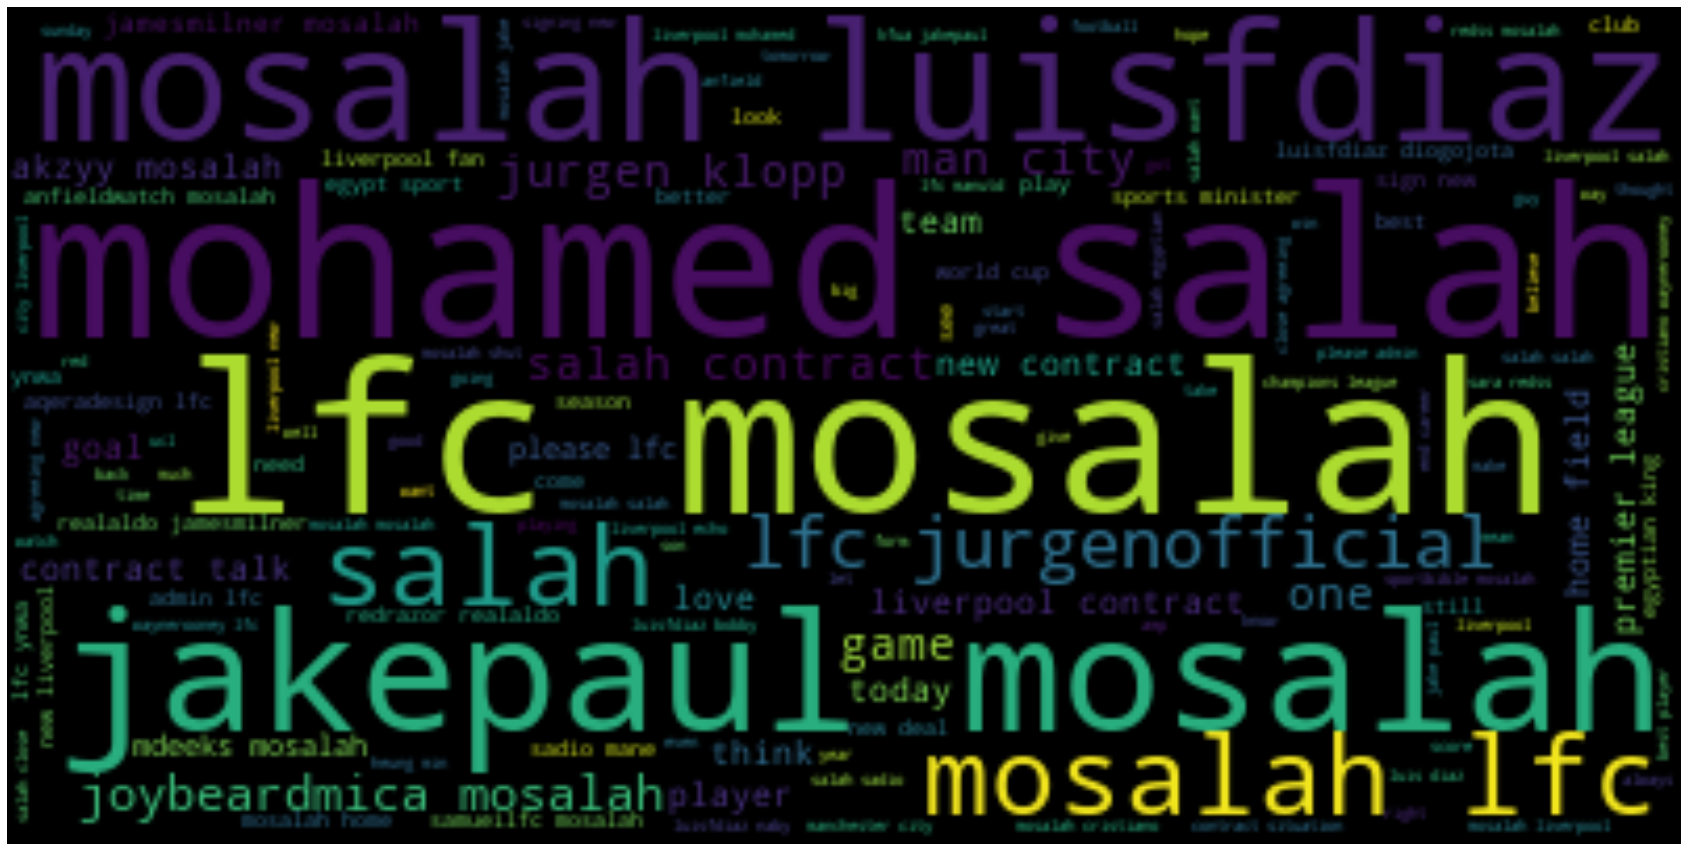

In [16]:
wordcloud =  create_wordcloud(' '.join(twint_df['tweet']))
fig = plt.figure(1,figsize=(30, 50))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('wc.png')
plt.show()

In [18]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer

In [19]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

In [20]:
twint_df.shape

(16217, 6)

In [21]:
twint_df.columns

Index(['id', 'date', 'time', 'username', 'tweet', 'stopwords'], dtype='object')

In [22]:
twint_df.columns = ["id","date", "time", "username","tweet","stopwords"]

In [23]:
twint_df.columns

Index(['id', 'date', 'time', 'username', 'tweet', 'stopwords'], dtype='object')

In [25]:
positive = 0
negative = 0
neutral = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for i in range(twint_df.shape[0]):
 
    tweet_list.append(twint_df.tweet[i])
    score = SentimentIntensityAnalyzer().polarity_scores(twint_df.tweet[i])
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
 
    if neg > pos:
        negative_list.append(twint_df.tweet[i])
        negative += 1
        twint_df.at[i,'pos/neg']='neg'
    elif pos > neg:
        positive_list.append(twint_df.tweet[i])
        positive += 1
        twint_df.at[i,'pos/neg']='pos'
    elif pos == neg:
        neutral_list.append(twint_df.tweet[i])
        neutral += 1
        twint_df.at[i,'pos/neg']='neutral'
positive = percentage(positive, twint_df.shape[0])
negative = percentage(negative, twint_df.shape[0])
neutral = percentage(neutral, twint_df.shape[0])
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')



In [ ]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

In [26]:
twint_df.tail()

,id,date,time,username,tweet,stopwords,pos/neg
16212,33339,2022-04-02,16:52:02,ciaran2607,mo salah best mate there,1,pos
16213,33342,2022-04-02,16:51:44,animesh76986348,liverpool impressed mo salah decided sal...,18,pos
16214,33347,2022-04-02,16:50:49,ini_bhuru98,kdb belgian magic sterling running wing li...,4,pos
16215,33351,2022-04-02,16:49:21,sefius1,abdoul diouf mosalah even get round of,3,neutral
16216,33353,2022-04-02,16:48:39,randomrecruiter,great win lfc starting think club would ...,6,pos


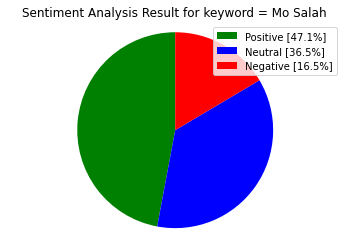

In [27]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['green', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword = Mo Salah" )
plt.axis('equal')
plt.show()

In [40]:
# create a dictionary of word frequencies
text = ' '.join(negative_list[0])
text_dictionary = wordcloud.process_text(text)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq = wordcloud.words_

#print results
print("Most frequent words")
print(list(word_freq.items())[0:50])


Most frequent words
[('https', 597), ('mohamed salah', 424), ('jakepaul mosalah', 402), ('salah', 385), ('lfc mosalah', 166), ('game', 128), ('man city', 119), ('goal', 118), ('player', 100), ('mosalah luisfdiaz', 96), ('jurgen klopp', 95), ('realaldo jamesmilner', 90), ('jamesmilner mosalah', 90), ('mosalah lfc', 86), ('need', 83), ('akzyy mosalah', 82), ('one', 76), ('redrazor realaldo', 76), ('world cup', 71), ('contract talk', 67), ('think', 64), ('salah contract', 64), ('know', 63), ('sadio mane', 63), ('liverpool contract', 61), ('team', 59), ('football', 58), ('premier league', 58), ('mosalah fuck', 57), ('time', 56), ('mdeeks mosalah', 56), ('form', 51), ('liverpool', 50), ('shit', 50), ('luisfdiaz diogojota', 48), ('lfc jurgenofficial', 48), ('still', 47), ('joybeardmica mosalah', 46), ('non penalty', 45), ('penalty goal', 44), ('wrong', 43), ('today', 42), ('city liverpool', 42), ('aqeradesign lfc', 42), ('home field', 41), ('club', 40), ('see', 40), ('want', 40), ('look', 40

In [35]:
twint_df.columns

Index(['id', 'date', 'time', 'username', 'tweet', 'stopwords'], dtype='object')

In [36]:
twint_df.head()

,id,date,time,username,tweet,stopwords
0,0,2022-04-10,16:21:11,james12hendry,jakepaul mosalah home field stick chasing ...,2
1,1,2022-04-10,16:21:01,jp1990uk,jakepaul mosalah fuck talking moronic yank,4
2,2,2022-04-10,16:20:54,superstones69,jakepaul mosalah new audiences glad ...,9
3,3,2022-04-10,16:20:49,ktiereny,jakepaul mosalah shut ya noise,0
4,4,2022-04-10,16:20:49,muhammada_06,ima x jakepaul mosalah thanks,0


In [28]:
twint_df.to_csv("updated_tweets.csv")